In [1]:
from distmesh import *
from FEM_TPT import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy

# personal libraries
import helpers as helpers

In [2]:
# Load Trajectory
fname = "LJ7_traj.npz"
inData = np.load(fname)
data = inData["data"]
print(f"Shape of trajectory data:{data.shape}")
N = data.shape[1]
print(f"Number of data points:{N}")

# Load Diffusions
fname = "LJ7_traj_diffusions.npz"
inData = np.load(fname)
diffusions = inData["diffusions"]
print(f"Shape of diffusion data:{diffusions.shape}")


# Load Free Energy
fname = "LJ7_free_energy_grid.npz"
inData = np.load(fname)
free_energy = inData["free_energy"]
nx = inData["nx"]
ny = inData["ny"]
xmin = inData["xmin"]
xmax = inData["xmax"]
ymin = inData["ymin"]
ymax = inData["ymax"]
print(f"Shape of free energy data:{free_energy.shape}")
print(f"nx:{nx}")
print(f"ny:{ny}")
print(f"xmin:{xmin}")
print(f"xmax:{xmax}")
print(f"ymin:{ymin}")
print(f"ymax:{ymax}")

Shape of trajectory data:(2, 10000)
Number of data points:10000
Shape of diffusion data:(10000, 2, 2)
Shape of free energy data:(401, 201)
nx:201
ny:401
xmin:0.2
xmax:1.2
ymin:-0.5
ymax:1.7


(-0.5, 1.7)

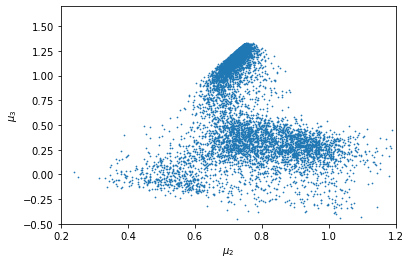

In [3]:
fig = plt.figure() 
plt.scatter(data[0, :], data[1, :], s=0.5)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


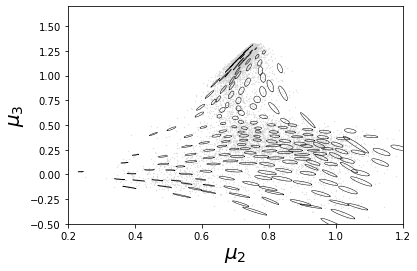

In [4]:
# Cluster data points for better visualization
n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(data.T)
    
# Plot sampling of diffusion tensors
fig = plt.figure() 
plt.scatter(data[0, :], data[1, :], s=0.1, c='lightgray')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$\mu_2$', size=20)
plt.ylabel(r'$\mu_3$', size=20)
for i in range(n_clusters):
    idx = np.argmin(np.sum((data.T - kmeans.cluster_centers_[i,:])**2,axis=1))
    C = diffusions[idx, :, :]
    helpers.plot_cov_ellipse(C, data[:, idx], plot_scale=0.01)
plt.show()



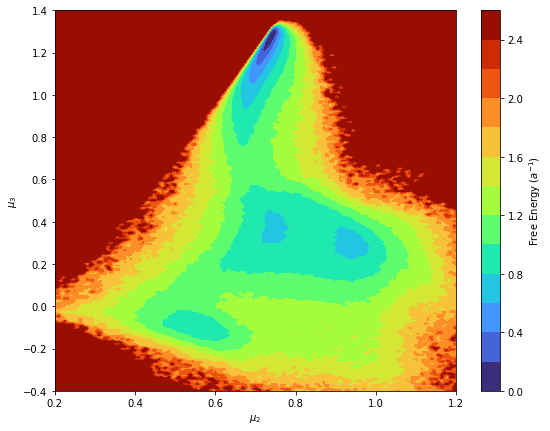

In [5]:
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

plt.figure()
fig = plt.gcf()
fig.set_size_inches(9, 7)
plt.contourf(xx, yy, free_energy, levels=15, cmap='turbo')
#plt.scatter(data[0, :], data[1, :], s=1, c='k')

cbar = plt.colorbar()
cbar.set_label('Free Energy ($a^{-1}$)')
plt.xlim([0.2, 1.2])
plt.ylim([-0.4, 1.4])
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.savefig('free_energy_LJ7.png')

[0.71842474 1.16072725] 0.10341984868086095
[ 0.55262069 -0.09351121] 0.0727505423769545


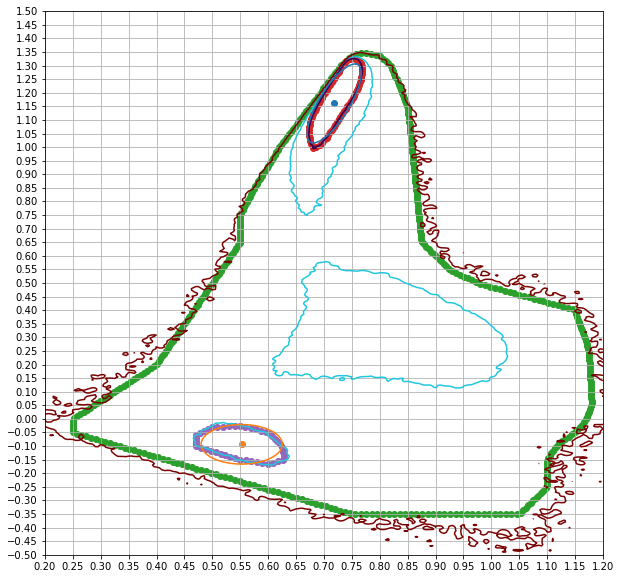

In [6]:
# # select region for triangulation
Vbdry = 1.8
Va = 1.0
Vb = 0.7
ax = plt.axes()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.contour(xx, yy, free_energy, [Vb,Va,Vbdry], cmap='turbo')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.grid(visible = True)
plt.savefig('LJ7domain.pdf')
axes=plt.gca()
plt.ylim([-0.5,1.5])
# axes.set_aspect(1)



h = 0.01

cB = plt.contour(xx, yy, free_energy, [Vb])
for item in cB.collections:
    for i in item.get_paths():
        pB = i.vertices

pB = np.concatenate((pB,np.reshape(pB[-1,:],(1,2))),axis=0)        
pB = reparametrization(pB,h)
NB = np.size(pB,axis=0)
pB = pB[0:NB-1,:]
NB = np.size(pB,axis=0)
#print(pB)
xyB = np.sum(pB,axis=0)/NB
stdB = np.sqrt(np.sum((pB[:,0]-xyB[0])**2+(pB[:,1]-xyB[1])**2)/NB)

t = np.linspace(0,2*np.pi,200)

print(xyB,stdB)
plt.scatter(xyB[0],xyB[1])
# plt.plot(xyB[0]+stdB*np.cos(t),xyB[1]+stdB*np.sin(t))
Rx = 0.15
Ry = 0.03
theta = 5*np.pi/12
plt.plot(Rx*np.cos(t)*np.cos(theta) - Ry*np.sin(t)*np.sin(theta)+xyB[0],
         Rx*np.cos(t)*np.sin(theta) + Ry*np.sin(t)*np.cos(theta)+xyB[1])


pA = np.array([[0.55,-0.025],[0.60,-0.05],[0.625,-0.10],[0.63,-0.15],[0.60,-0.165],[0.55,-0.15],\
              [0.50,-0.12],[0.47,-0.10],[0.47,-0.06],[0.50,-0.03],[0.55,-0.025]])
pA = reparametrization(pA,h)
NA = np.size(pA,axis=0)
pA = pA[0:NA-1,:]
NA = np.size(pA,axis=0)
# print(pA)
xyA = np.sum(pA,axis=0)/NA
stdA = np.sqrt(np.sum((pA[:,0]-xyA[0])**2+(pA[:,1]-xyA[1])**2)/NA)

print(xyA,stdA)
plt.scatter(xyA[0],xyA[1])
plt.plot(xyA[0]+stdA*np.cos(t),xyA[1]+stdA*np.sin(t))






p_outer = np.array([[0.75,1.335],[0.77,1.35],[0.80,1.335],[0.82,1.30],[0.83,1.25],[0.84,1.20],[0.85,1.15],\
                    [0.875,0.65],[0.925,0.55],[0.975,0.50],[1.15,0.40],[1.175,0.25],[1.18,0.05],[1.17,0.0],[1.15,-0.05],\
                    [1.12,-0.09],[1.10,-0.15],[1.10,-0.25],[1.05,-0.35],[0.75,-0.35],[0.25,-0.05],[0.25,0.0],[0.40,0.20],\
                    [0.55,0.65],[0.55,0.75],[0.575,0.85],[0.60,0.93],[0.62,1.0],[0.73,1.3],[0.75,1.335]])
p_outer = reparametrization(p_outer,h)
Nouter = np.size(p_outer,axis=0)
p_outer = p_outer[0:Nouter-1,:]
Nouter = np.size(p_outer,axis=0)

plt.scatter(p_outer[:,0],p_outer[:,1])
plt.scatter(pB[:,0],pB[:,1])
plt.scatter(pA[:,0],pA[:,1])

plt.savefig('LJ7_reducedmodel.pdf')

In [7]:
# with open('LJ7_pts_outer_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(p_outer)
# with open('LJ7_pts_A_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(pA)  
# with open('LJ7_pts_B07_bdry.csv', 'w', newline='') as file:
#     mywriter = csv.writer(file, delimiter=',')
#     mywriter.writerows(pB)        

12345
22424
182
324


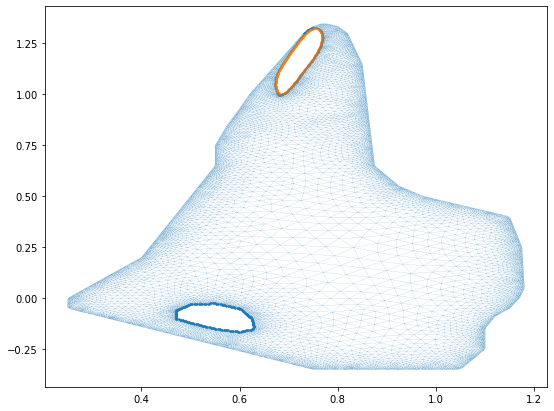

In [8]:
# download triangular mesh
pts = np.loadtxt('LJ7_pts_B07.csv', delimiter=',', dtype=float)
tri = np.loadtxt('LJ7_tri_B07.csv', delimiter=',', dtype=int)
Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
print(Npts)
print(Ntri)
# download indices of mesh points at the boundaries of A and B
Aind = np.loadtxt('LJ7_Abdry_B07.csv', delimiter=',', dtype=int) # find mesh points on \partial A
NAind = np.size(Aind)
print(NAind)
Bind = np.loadtxt('LJ7_Bbdry_B07.csv', delimiter=',', dtype=int)  # find mesh points on \partial B
NBind = np.size(Bind)
print(NBind)

fig = plt.gcf()
fig.set_size_inches(9, 7)
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
plt.savefig('LJ72D_trimesh_B07.pdf')


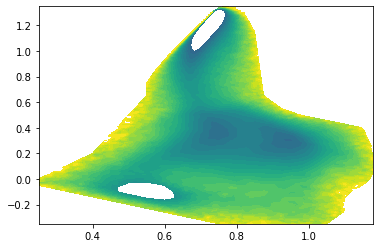

In [9]:
# interpolate the free enegry from the regular grid onto the mesh points
FE = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(free_energy)) #, method = "linear",bounds_error=False, fill_value = 1.8)
Fpts = FE(pts)
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.arange(0.2,1.8,0.05) )

In [11]:
# interpolate entries of the diffusion matrix onto the mesh points
print(np.shape(data))
print(np.shape(diffusions[:,0,0]))
# data are the trajectory data
# (xx,yy) - meshgrid points
M11grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,0,0],(xx,yy),method = 'linear')
M12grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,0,1],(xx,yy),method = 'linear')
M22grid = scipy.interpolate.griddata(np.transpose(data),diffusions[:,1,1],(xx,yy),method = 'linear')

(2, 10000)
(10000,)


In [12]:
print(M11grid.shape)

(401, 201)


0  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values
718  points with nan or inf values
718  points with nan or inf values
718  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values
0  points with nan or inf values


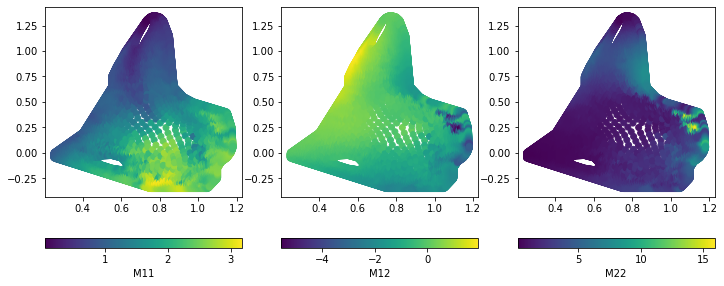

In [13]:
def check_inf_nan(arr):
    ind_bad = np.argwhere(np.isnan(arr))
    print(np.size(ind_bad)," points with nan or inf values")
    return ind_bad

ind_bad = check_inf_nan(diffusions[:,0,0])
ind_bad = check_inf_nan(diffusions[:,0,1])
ind_bad = check_inf_nan(diffusions[:,1,1])

# Mijgrid are matrix enties linearly interpolated onto regular grid
# create linear interpolator functions
M11fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M11grid))
M12fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M12grid))
M22fun = scipy.interpolate.RegularGridInterpolator((x,y),np.transpose(M22grid))
# evaluate linear interpolator functions at the FEM mesh points
M11pts = M11fun(pts)
M12pts = M12fun(pts)
M22pts = M22fun(pts)

# at some points, the linear interpolator fails
# We create a nearest neighbor interpolator for these bad points
ind_bad = check_inf_nan(M11pts)
M11fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,0,0])
M11pts[ind_bad] = M11fun_NN(pts[ind_bad,:])

ind_bad = check_inf_nan(M12pts)
M12fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,0,1])
M12pts[ind_bad] = M12fun_NN(pts[ind_bad,:])

ind_bad = check_inf_nan(M22pts)
M22fun_NN = scipy.interpolate.NearestNDInterpolator(np.transpose(data), diffusions[:,1,1])
M22pts[ind_bad] = M22fun_NN(pts[ind_bad,:])

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.subplot(1,3,1)
plt.scatter(pts[:,0], pts[:,1],c = M11pts)
plt.colorbar(label="M11", orientation="horizontal")
ind_bad = check_inf_nan(M11pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.subplot(1,3,2)
plt.scatter(pts[:,0], pts[:,1],c = M12pts)
plt.colorbar(label="M12", orientation="horizontal")
ind_bad = check_inf_nan(M12pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.subplot(1,3,3)
plt.scatter(pts[:,0], pts[:,1],c = M22pts)
plt.colorbar(label="M22", orientation="horizontal")
ind_bad = check_inf_nan(M22pts)
plt.scatter(pts[ind_bad,0], pts[ind_bad,1],s = 0.1)
plt.savefig('LJ72D_Mmatrix.pdf')


In [14]:
np.savez('Mpts.npz',M11pts = M11pts, M12pts = M12pts, M22pts = M22pts)

In [15]:
# find the committor
beta = 5
q = FEM_committor_solver(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)

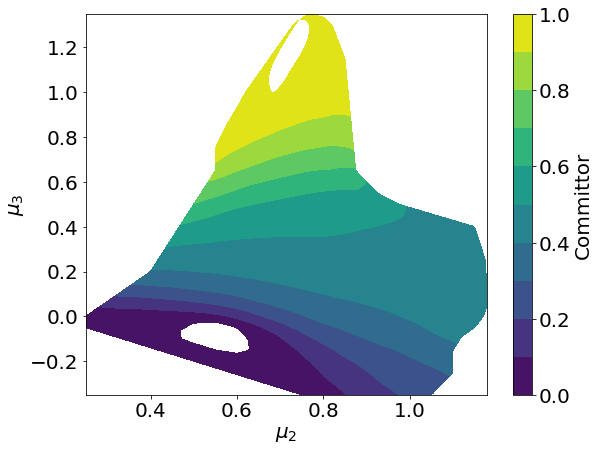

In [21]:
# visualize the committor
fig = plt.gcf()
fig.set_size_inches(9, 7)
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.xlabel('$\mu_2$')
plt.ylabel('$\mu_3$')
plt.savefig('LJ72D_committor_B07.png')

In [14]:
# find the reactive current and the transition rate
Rcurrent, Rrate = reactive_current_and_transition_rate(pts,tri,Fpts,M11pts,M12pts,M22pts,beta,q)
print("Transition rate = ",Rrate)

Transition rate =  0.1377956400677969


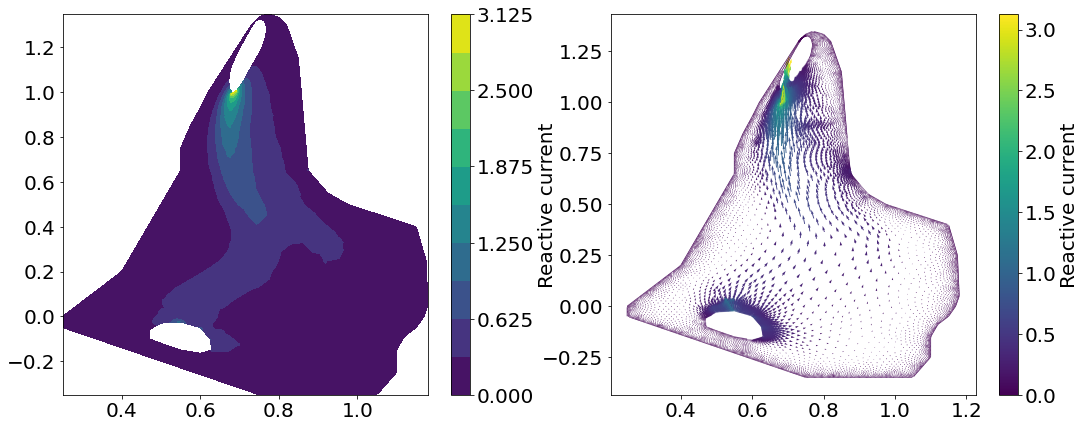

In [15]:
# visualize the reactive current
# find the absolute value of the reactive current
ARcurrent = np.linalg.norm(Rcurrent,axis = 1)
ARCmax = np.amax(ARcurrent)
fig = plt.gcf()
fig.set_size_inches(18, 7)
plt.subplot(1,2,1)
plt.tricontourf(pts[:,0], pts[:,1],tri,ARcurrent,np.linspace(0,ARCmax,11))
plt.colorbar(label="Reactive current", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
#plt.savefig('LJ7_rcurrent.pdf')
#plt.show()
plt.subplot(1,2,2)
plt.quiver(pts[:,0],pts[:,1],Rcurrent[:,0],Rcurrent[:,1],ARcurrent)
plt.colorbar(label="Reactive current", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.savefig('LJ7_rcurrent_B07.pdf')

In [16]:
# save the mesh point, the committor, and the reactive current
TPTdata = np.concatenate((pts,np.reshape(q,(Npts,1)),Rcurrent),axis = 1)
with open('LJ7_TPTdata_B07.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(TPTdata)

In [17]:
# # committor analysis
# fig = plt.gcf()
# fig.set_size_inches(9, 7)
# plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
# plt.colorbar(label="Committor", orientation="vertical")
# c05 = plt.tricontour(pts[:,0], pts[:,1],tri,q, [0.5])
# for item in c05.collections:
#     for i in item.get_paths():
#         p05 = i.vertices
# p05 = reparametrization(p05,1e-2)        
# print(np.shape(p05))
# Nq05 = np.size(p05,axis = 0)
# print(Nq05)

In [18]:
# Ntraj = 100 # trajectories per point
# h = 0.00015 # timestep
# sigma = np.sqrt(2*h/beta) # standard deviation
# MeanForce_pts = mean_force(pts,tri,Fpts)
# MF1 = scipy.interpolate.NearestNDInterpolator(pts, MeanForce_pts[:,0])
# MF2 = scipy.interpolate.NearestNDInterpolator(pts, MeanForce_pts[:,1])
# Va = 1.0
# Vb = 0.7

# x_vec = np.reshape(xx,(nx*ny,1))
# y_vec = np.reshape(yy,(nx*ny,1))
# fe_vec = np.reshape(free_energy,(nx*ny,1))
# xy = np.concatenate((x_vec,y_vec),axis = 1)

# FE_NN = scipy.interpolate.NearestNDInterpolator(xy,fe_vec) #, method = "linear",bounds_error=False, fill_value = 1.8)

In [19]:
# # the boundary of the region
# p_domain = np.array([[0.75,1.335],[0.77,1.35],[0.80,1.335],[0.82,1.30],[0.83,1.25],[0.84,1.20],[0.85,1.15],\
#                     [0.875,0.65],[0.925,0.55],[0.975,0.50],[1.15,0.40],[1.175,0.25],[1.18,0.05],[1.17,0.0],[1.15,-0.05],\
#                     [1.12,-0.09],[1.10,-0.15],[1.10,-0.25],[1.05,-0.35],[0.75,-0.35],[0.25,-0.05],[0.25,0.0],[0.40,0.20],\
#                     [0.55,0.65],[0.55,0.75],[0.575,0.85],[0.60,0.93],[0.62,1.0],[0.73,1.3],[0.75,1.335]])

# pA = np.array([[0.55,-0.025],[0.60,-0.05],[0.625,-0.10],[0.63,-0.15],[0.60,-0.165],[0.55,-0.15],\
#                [0.50,-0.12],[0.47,-0.10],[0.47,-0.06],[0.50,-0.03],[0.55,-0.025]])

# cB = plt.contour(xx, yy, free_energy, [Vb])
# for item in cB.collections:
#     for i in item.get_paths():
#         pB = i.vertices

# pB = reparametrization(pB,0.1)

# print(np.size(p_domain,axis=0))
# print(np.size(pA,axis=0))
# print(np.size(pB,axis=0))
                    
                    
                    
# # check if a point is inside or outside a polygon
# def unit_vector(vector):
#     """ Returns the unit vector of the vector.  """
#     return vector / np.linalg.norm(vector)

# def angle_between(v1, v2):
#     """ Returns the angle in radians between vectors 'v1' and 'v2'::

#             >>> angle_between((1, 0, 0), (0, 1, 0))
#             1.5707963267948966
#             >>> angle_between((1, 0, 0), (1, 0, 0))
#             0.0
#             >>> angle_between((1, 0, 0), (-1, 0, 0))
#             3.141592653589793
#     """
#     v1_u = unit_vector(v1)
#     v2_u = unit_vector(v2)
#     cos = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
#     sin = v1_u[0]*v2_u[1] - v1_u[1]*v2_u[0]
#     if sin >= 0.0:
#         return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
#     else:
#         return -np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

# def inside_or_outside(x,p):
#     Np = np.size(p,axis = 0)
#     total_angle = 0.0
#     v0 = p[0,:] - x
#     for j in range(Np):
#         v1 = p[(j+1)%Np,:] - x
#         a = angle_between(v0,v1)
#         # print(a)
#         total_angle = total_angle + a
#         v0 = v1
# #    print(total_angle)
#     if np.abs(np.abs(total_angle) - 2*np.pi) < 0.5:
#         return True
#     else:
#         return False
    
    
# #print(inside_or_outside(np.array([0.4,0.0]),p_domain))    

In [20]:
# print(np.shape(MeanForce_pts))
# fig = plt.gcf()
# fig.set_size_inches(9, 7)
# plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
# plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
# plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
# plt.tricontour(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
# plt.colorbar(label="Committor", orientation="vertical")
# c05 = plt.tricontour(pts[:,0], pts[:,1],tri,q, [0.5])
# countB = np.zeros((Nq05,))
# # run Euler-Maruyama
# Ntraj_max = 500000
# xtraj = np.zeros((Ntraj_max+1,2))
# for j in range(Nq05):
#     for k in range(Ntraj):
#         xtraj[0,:] = p05[j,:]
#         x = p05[j,:]
#         wset = np.random.normal(0,sigma,(Ntraj_max,2))
#         step = 0        
#         while (inside_or_outside(x,pA) == False) and  (inside_or_outside(x,pB) == False):
#             w = wset[step,:]
#             M11x = M11fun_NN(x)
#             M12x = M12fun_NN(x)
#             M22x = M22fun_NN(x)
#             Mx = np.reshape(np.array([[M11x,M12x],[M12x,M22x]]),(2,2))
#             rootMx = scipy.linalg.sqrtm(Mx)
#             Fx = MF1(x)
#             Fy = MF2(x)
#             drift = np.reshape(-np.array([M11x*Fx + M12x*Fy,M12x*Fx + M22x*Fy])*h,(2,))
#             diff_term = np.array([rootMx[0,0]*w[0]+rootMx[0,1]*w[1],rootMx[1,0]*w[0]+rootMx[1,1]*w[1]])
#             xnew = x + drift + diff_term 
#             if inside_or_outside(xnew,p_domain) == True:
#                 x = xnew
#             # print(x)
#             # print(drift)
#             # print(diff_term)
#             step = step + 1
#             xtraj[step,:] = x
#         Nsteps = step + 1       
#         # plt.plot(xtraj[0:Nsteps,0],xtraj[0:Nsteps,1],linewidth = 0.5)
#         # plt.scatter(xtraj[0,0],xtraj[0,1])
#         # print("j = ",j," k = ",k," Nsteps = ",Nsteps)
#         if inside_or_outside(x,pB) == True:
#             countB[j] = countB[j] + 1    
#     print("j = ",j," countB = ",countB[j])
         

NameError: name 'MeanForce_pts' is not defined

In [ ]:
countB = countB/Ntraj
plt.hist(countB)

In [ ]:
# save the mesh point, the committor, and the reactive current
committor_analysis_data = np.concatenate((p05,np.reshape(countB,(Nq05,1))),axis = 1)
with open('LJ7_TPTdata_B07.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(committor_analysis_data)